In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.experimental import enable_iterative_imputer

In [4]:
from sklearn.impute import IterativeImputer

In [8]:
df = pd.DataFrame({
    'age': [25,27,29,31,33,np.nan],
    'experience': [np.nan, 3,5,7,9,11],
    'salary': [50, np.nan, 110,140,170,200],
    'purchased' : [0,1,1,0,1,0]
})
df

,age,experience,salary,purchased
0,25.0,NaN,50.0,0
1,27.0,3.0,NaN,1
2,29.0,5.0,110.0,1
3,31.0,7.0,140.0,0
4,33.0,9.0,170.0,1
5,NaN,11.0,200.0,0


In [34]:
X = df.iloc[:,:-1]

In [36]:
y = df.iloc[:,-1:]

In [37]:
X

,age,experience,salary
0,25.0,NaN,50.0
1,27.0,3.0,NaN
2,29.0,5.0,110.0
3,31.0,7.0,140.0
4,33.0,9.0,170.0
5,NaN,11.0,200.0


In [38]:
y

,purchased
0,0
1,1
2,1
3,0
4,1
5,0


In [42]:
df.corr()

,age,experience,salary,purchased
age,1.000000,1.00000,1.000000,0.288675
experience,1.000000,1.00000,1.000000,-0.577350
salary,1.000000,1.00000,1.000000,0.094916
purchased,0.288675,-0.57735,0.094916,1.000000


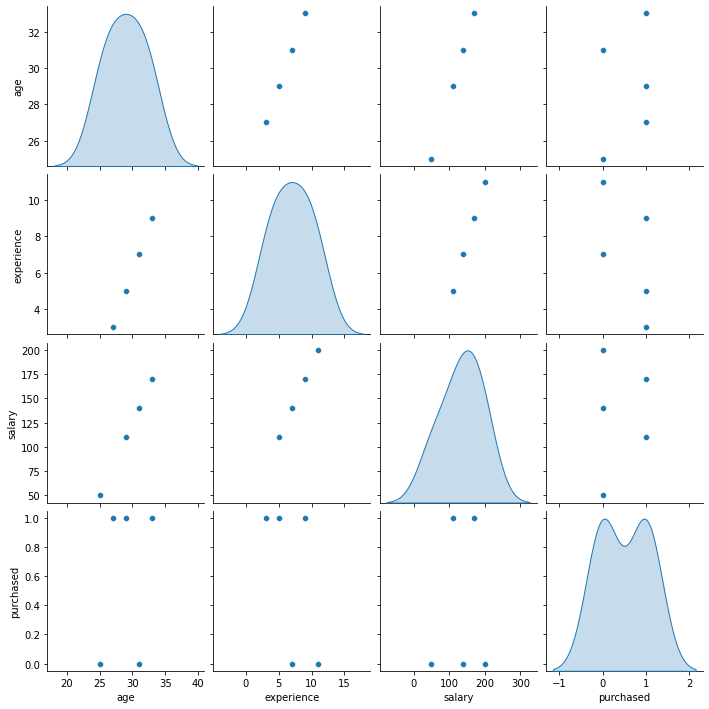

In [41]:
sns.pairplot(df,diag_kind='kde')

In [43]:
lr = LinearRegression()
# I'm using Linear Regression because all the features are highly correlated with each other
# In most real life datasets, they will be not, and the need will arise to use other regressors

imp = IterativeImputer(estimator=lr, verbose=2, max_iter=30, tol=1e-10, imputation_order='roman')
# play around with the max_iter and tol parameters to get a better feel of how it is working

In [44]:
# to find "scaled tolerance", multiply the tolerance with the max of the absolute values
# in the original dataset 
1e-10 * 200

2e-08

In [45]:
imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (6, 3)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.03
[IterativeImputer] Change: 61.22518987714514, scaled tolerance: 2e-08 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.03
[IterativeImputer] Change: 7.963767891095671, scaled tolerance: 2e-08 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.04
[IterativeImputer] Change: 0.7509179143104063, scaled tolerance: 2e-08 
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.04
[IterativeImputer] Change: 0.013116467770018403, scaled tolerance: 2e-08 
[IterativeImputer] Ending imputation round 5/30, elapsed time 0.05
[IterativeImputer] Change: 0.0008142526488796875, scaled tolerance: 2e-08 
[IterativeImputer] Ending imputation round 6/30, elapsed time 0.05
[IterativeImputer] Change: 3.9720598692838394e-05, scaled tolerance: 2e-08 
[IterativeImputer] Ending imputation round 7/30, elapsed time 0.06
[IterativeImputer] Change: 2.14128994

array([[ 25.,   1.,  50.],
       [ 27.,   3.,  80.],
       [ 29.,   5., 110.],
       [ 31.,   7., 140.],
       [ 33.,   9., 170.],
       [ 35.,  11., 200.]])

In [47]:
proc_x = imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (6, 3)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.00
[IterativeImputer] Change: 61.22518987714514, scaled tolerance: 2e-08 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.01
[IterativeImputer] Change: 7.963767891095671, scaled tolerance: 2e-08 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.01
[IterativeImputer] Change: 0.7509179143104063, scaled tolerance: 2e-08 
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.02
[IterativeImputer] Change: 0.013116467770018403, scaled tolerance: 2e-08 
[IterativeImputer] Ending imputation round 5/30, elapsed time 0.03
[IterativeImputer] Change: 0.0008142526488796875, scaled tolerance: 2e-08 
[IterativeImputer] Ending imputation round 6/30, elapsed time 0.03
[IterativeImputer] Change: 3.9720598692838394e-05, scaled tolerance: 2e-08 
[IterativeImputer] Ending imputation round 7/30, elapsed time 0.04
[IterativeImputer] Change: 2.14128994

In [49]:
proc_x.shape

(6, 3)

In [53]:
proc_x

array([[ 25.,   1.,  50.],
       [ 27.,   3.,  80.],
       [ 29.,   5., 110.],
       [ 31.,   7., 140.],
       [ 33.,   9., 170.],
       [ 35.,  11., 200.]])

In [50]:
X

,age,experience,salary
0,25.0,NaN,50.0
1,27.0,3.0,NaN
2,29.0,5.0,110.0
3,31.0,7.0,140.0
4,33.0,9.0,170.0
5,NaN,11.0,200.0


In [62]:
X['age'].fillna(X.age.mean(),inplace=True)
X['experience'].fillna(X.experience.mean(),inplace=True)
X['salary'].fillna(X.salary.mean(),inplace= True)

In [61]:
mice_df = pd.DataFrame(data = proc_x,columns = ['age','experience','salary'])

In [63]:
X

,age,experience,salary
0,25.0,7.0,50.0
1,27.0,3.0,134.0
2,29.0,5.0,110.0
3,31.0,7.0,140.0
4,33.0,9.0,170.0
5,29.0,11.0,200.0


In [64]:
mice_df

,age,experience,salary
0,25.0,1.0,50.0
1,27.0,3.0,80.0
2,29.0,5.0,110.0
3,31.0,7.0,140.0
4,33.0,9.0,170.0
5,35.0,11.0,200.0


In [65]:
import datetime


In [71]:
print("Current date is :", datetime.datetime.now())

Current date is : 2021-07-08 17:33:32.111442
